# 7. Partial Differential Equations: Exercise Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

## 1. Diffusion Equation
For the diffusion equation with Dirichlet boundary condition, take initial states with different spatial frequencyes, such as 
$$ y(x, 0) = \sin(\frac{nx}{L}\pi ) $$
with different $n$, and see how quickly they decay in time.

In [2]:
def diff1D(y, t, x, D, inp=None):
    """1D Diffusion equaiton with constant boundary condition
    y: state vector
    t: time
    x: positions
    D: diffusion coefficient
    input: function(y,x,t)"""
    dx = x[1] - x[0]  # space step
    # shift to left and right and subtract
    d2ydx2 = (y[:-2] -2*y[1:-1] + y[2:])/dx**2
    # add 0 to both ends for Dirichlet boundary condition
    d2ydx2 = np.hstack((0, d2ydx2, 0))
    if inp == None:
        return D*d2ydx2
    else:
        return D*d2ydx2 + inp(y, x, t)

In [3]:
Lx = 5   # length
N = 50
x = np.linspace(0, Lx, N+1)
D = 0.1  # diffusion constant
ts = 10
dt = 0.1
t = np.arange(0, ts, dt)

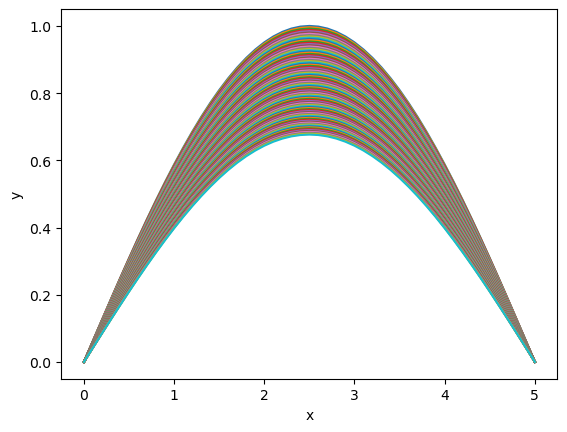

In [4]:
n = 1  # frequency
y0 = np.sin(n*np.pi*x/Lx)  # initial condition
y = odeint(diff1D, y0, t, (x, D))
p = plt.plot(x, y.T)
plt.xlabel("x"); plt.ylabel("y");

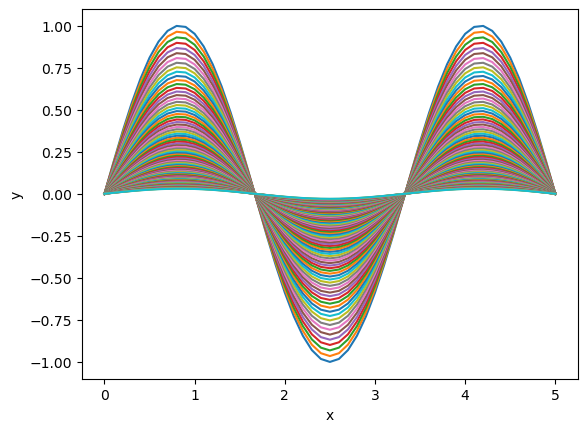

In [5]:
n = 3  # frequency
y0 = np.sin(n*np.pi*x/Lx)  # initial condition
y = odeint(diff1D, y0, t, (x, D))
p = plt.plot(x, y.T)
plt.xlabel("x"); plt.ylabel("y");

## 2. Wave Equation

While the wave equation with Dirichlet boundary condition simulates oscillation of a string, that with Neumann condition 
$$ \left.\frac{\partial y(x,t)}{\partial x}\right|_{x_0}=\left.\frac{\partial y(x,t)}{\partial x}\right|_{x_N}=0 $$
can simulate water wave.

1) Implement a wave equation with a decay term
$$ \frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2} - d \frac{\partial u}{\partial t} $$
with the Neumann boundary conditions and see how the wave ripples.

In [6]:
def wave1N(y, t, x, c, d, inp=0.):
    """1D wave equaiton with constant boundary
    y: state vector hstack(u, v)
    t: time
    x: positions
    c: wave speed
    input: function(y,x,t)"""
    n = int(len(y)/2)
    u, v = y[:n], y[n:]
    dx = x[1] - x[0]
    # Neuman boundary conditions
    d2udx2 = (np.r_[u[1],u[:-1]] -2*u + np.r_[u[1:],u[-2]])/dx**2
    dvdt = c**2*d2udx2 - d*v + (inp(y,x,t) if callable(inp) else inp)
    return np.r_[v, dvdt]

2) See how the waves vary with the initial condition or stimulum.

In [7]:
def pulse(y, x, t, xp=[0,1], tp=[0,1]):
    """1 for 0<x<1 at 0<t<1"""
    return (xp[0]<x)*(x<xp[1])*(tp[0]<t)*(t<tp[1])*1.

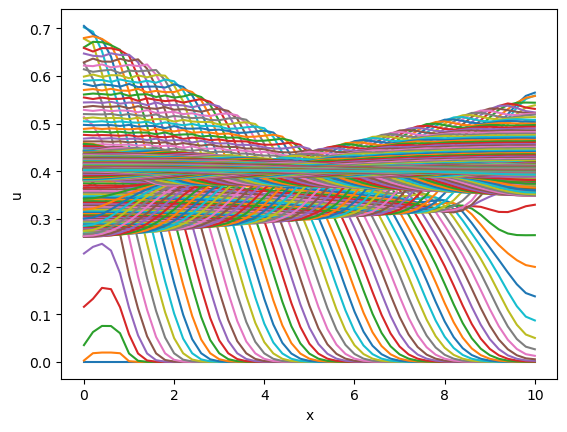

In [8]:
Lx = 10
N = 50
x = np.linspace(0, Lx, N+1)
y0 = np.zeros(2*(N+1))  # initial condition
#y0[10:20] = 0.1 # a peak
c = 1.  # wave speed
d = 0.2  # damping
ts = 50
dt = 0.2
t = np.arange(0, ts, dt)
y = odeint(wave1N, y0, t, (x, c, d, pulse))
plt.plot(x, y[:,:N+1].T)
plt.xlabel("x"); plt.ylabel("u"); 

In [9]:
%matplotlib notebook

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
T, X = np.meshgrid(t, x)
ax.plot_surface(T, X, y[:,:N+1].T, cmap='viridis')
plt.xlabel("t"); plt.ylabel("x"); 

<IPython.core.display.Javascript object>

In [11]:
from matplotlib import animation

In [12]:
fig = plt.figure()
frames = []  # prepare frame
for i, ti in enumerate(t):
    p = plt.plot(x, y[i,:N+1])
    plt.xlabel("x"); plt.ylabel("y");
    frames.append(p)    
anim = animation.ArtistAnimation(fig, frames, interval = 10)

<IPython.core.display.Javascript object>

## Optional: Wave equation in 2D
Try simulating waves in a 2D space with a cyclic boundary condition.

In [13]:
def wave2C(y, t, x, c, d, inp=0):
    """2D Wave equaiton with Cyclic boundary condition
    y: 2*n*n dim state vector hstack(u, v)
    t: time
    x: positions (x0, x1): transposed meshgrid
    D: diffusion coefficient
    inp: function(y,x,t) or number"""
    n = x.shape[:2]  # grid size (n0, n1)
    nn = n[0]*n[1]  # grid points n0*n1
    u = y[:nn].reshape(n)  # 2D grid
    v = y[nn:].reshape(n)
    dx = [x[1,0,0]-x[0,0,0], x[0,1,1]-x[0,0,1]]  # space step
    # Laplacian with Cyclic boundary
    Lu = (np.roll(u,-1,0) + np.roll(u,1,0) + np.roll(u,-1,1) + np.roll(u,1,1) - 4*u)/dx[0]**2
    dvdt = c**2*Lu - d*v + (inp(y,x,t) if callable(inp) else inp)
    return np.r_[v, dvdt].ravel()

In [14]:
L = 10
N = 20
X = np.meshgrid(np.linspace(0,L,N), np.linspace(0,L,N))
x = np.array(X).transpose(2,1,0)  # (x0,x1) in last dimention
y0 = np.zeros((2,N,N))  # initial condition
y0[0,2:4,5:8] = 1  # 
c = 0.2  # wave speed
d = 0.1  # damping
ts = 100
dt = 0.2
t = np.arange(0, ts, dt)

In [15]:
y = odeint(wave2C, y0.ravel(), t, (x, c, d))

In [16]:
fig = plt.figure(figsize=(8,3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(y[10*i,:N*N].reshape(N,N).T, vmin=-0.2, vmax=1);

<IPython.core.display.Javascript object>

In [17]:
fig = plt.figure()
frames = []  # prepare frame
for i, ti in enumerate(t):
    p = plt.imshow(y[i,:N*N].reshape(N,N).T, vmin=-0.2, vmax=1)
    frames.append([p])    
anim = animation.ArtistAnimation(fig, frames, interval = 10)
plt.xlabel("x1"); plt.ylabel("x2");

<IPython.core.display.Javascript object>

/Users/doya/miniforge3/lib/python3.9/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [18]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
frames = []  # prepare frame
for i, ti in enumerate(t):
    p = ax.plot_surface(X[0], X[1], y[i,:N*N].reshape(N,N).T, cmap='viridis')
    frames.append([p])    
anim = animation.ArtistAnimation(fig, frames, interval = 10)
plt.xlabel("x1"); plt.ylabel("x2");

<IPython.core.display.Javascript object>